### Goal: Learn a neural network for the following function 

$\Lambda:\mathcal{S}\times \mathcal{A} \rightarrow \mathbb R$

where $\mathcal{S}$ is a state-space, $\mathcal{A}$ is an action-space

$\mathcal{S} = \{s_1, s_2, s_3, \dots, s_N\}$ and 

$\mathcal{A} = \{a_1, a_2, a_3, \dots, a_M\}$


### Import Dependencies
In this code, we use pytorch module to build and train neural networks. However, the training is done using the DQN algorithm which learns the neural network as the data grows with agent's experience.

In [72]:
import numpy as np 
import torch 
import torch.nn as nn 
import torch.optim as optim 
from itertools import chain 
from tqdm import tqdm 
import matplotlib.pyplot as plt 
import pickle 
import Env_FLPO
import importlib
import Agent
import train_lambda
importlib.reload(Agent)
importlib.reload(train_lambda)
from Agent import lambda_approximator, train_nn, config_nn
from train_lambda import learn_lambda

#### Create and test the environment

In [69]:
filename = 'smallCellNetData.pkl'
env_flpo = Env_FLPO.Env_FLPO(filename, init_distribution='unifStates') # 'unifNodes', 'unifStates'


In [70]:
print('number of nodes = ', env_flpo.n)
print('number of facilities = ', env_flpo.f)
print('state space = ' , env_flpo.state_space)
print('action space = ' , env_flpo.action_space)
print('num states = ', env_flpo.state_space_size)
print('num actions = ', env_flpo.act_space_size)
print('parameters = ', env_flpo.parameters())
print('num parameters = ', len(env_flpo.parameters()))
# print('initial distribution = ', env_flpo.rho)

# set a state and get possible actions
id_state = np.random.choice(a = np.arange(env_flpo.state_space_size), p = env_flpo.rho)
env_flpo.setState(*env_flpo.state_space[id_state])
# env_flpo.setState(101)
print('initial state = ' , env_flpo.st)
acts = env_flpo.get_actions(*env_flpo.state());
# acts = env_flpo.action_space
print('actions possible ', '=', acts)

# pick an action
policy_st = np.ones(len(acts))/len(acts)
print('policy = ', policy_st)
action = acts[np.random.choice(a=range(len(acts)), p=policy_st)]
print('action = ', action)
# get next state
nextState = env_flpo.state_space[
    np.random.choice(a=np.arange(env_flpo.state_space_size), p=env_flpo.P[(*env_flpo.state(), *action)])]
print('next state =', nextState)
print('cost = ', env_flpo.C[(*env_flpo.state(), *action, *nextState)])
# print('cost1 = ', env_flpo.C[(8, *(9,), *(10,))])
print('probability = ', env_flpo.P[(*env_flpo.state(), *action, *nextState)])
print('cost_matrix = ', env_flpo.C[(*env_flpo.state(),*action)])
print('probability_matrix = ', env_flpo.P[(*env_flpo.state(),*action)])

number of nodes =  500
number of facilities =  20
state space =  [(0,), (1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,), (10,), (11,), (12,), (13,), (14,), (15,), (16,), (17,), (18,), (19,), (20,), (21,), (22,), (23,), (24,), (25,), (26,), (27,), (28,), (29,), (30,), (31,), (32,), (33,), (34,), (35,), (36,), (37,), (38,), (39,), (40,), (41,), (42,), (43,), (44,), (45,), (46,), (47,), (48,), (49,), (50,), (51,), (52,), (53,), (54,), (55,), (56,), (57,), (58,), (59,), (60,), (61,), (62,), (63,), (64,), (65,), (66,), (67,), (68,), (69,), (70,), (71,), (72,), (73,), (74,), (75,), (76,), (77,), (78,), (79,), (80,), (81,), (82,), (83,), (84,), (85,), (86,), (87,), (88,), (89,), (90,), (91,), (92,), (93,), (94,), (95,), (96,), (97,), (98,), (99,), (100,), (101,), (102,), (103,), (104,), (105,), (106,), (107,), (108,), (109,), (110,), (111,), (112,), (113,), (114,), (115,), (116,), (117,), (118,), (119,), (120,), (121,), (122,), (123,), (124,), (125,), (126,), (127,), (128,), (129,), (130

In [49]:
# test 
test_nn = lambda_approximator()
input = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
output = test_nn(input)
print(output)

tensor([[-0.6055],
        [-0.9952]], grad_fn=<AddmmBackward0>)


#### Create and test the agent neural network

agent_nn = lambda_approximator()
target_nn = lambda_approximator()
loss_fn, optimizer, scheduler = config_nn(agent_nn, 'adam', 1)
config = {'loss_fn':loss_fn, 'optimizer':optimizer, 'scheduler':scheduler}
opts = {'steps_update_target':400, 'D_max':1000, 'batch_size':900, 'n_timeSteps':15000, 'n_episodes':20000, 'eps':0.99}
episode_loss = learn_lambda(env_flpo, agent_nn, target_nn, train_config=config, beta=100, gamma=0.99, options=opts)

[[], 17.20842742919922]


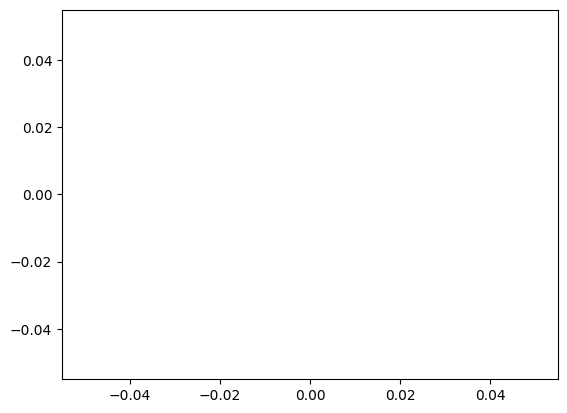

In [101]:
print(episode_loss)
plt.plot(episode_loss[0])